In [1]:
## testing the virial equilibrium ## 
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
from decimal import Decimal # to print in scientific notation
import os.path
import scipy.integrate as integrate

In [2]:
# parameters that are needed.
distinpc = 120.0
pc = 3.0857e+18 # cm 
AU = 1.496e+13  # cm
amu = 1.6605402e-24 # g
mu = 2.33*amu
mperH2= 2.8* amu
Msun=1.9891e+33 # g
G = 6.67259e-8 # cm3 g-1 s-2

In [3]:
## read the data file in fp
fileName = "./data_sigma/H-MM1_sigmav.dat"
fp = open (fileName,'r')
## Declaring an empty list to store the data from the .dat file
radius1_list = []  # units cm 
vthermal_list= []      # units cm^{-3}
vnontherma_list = []

## Reading the data from a .dat file line by line
for line in fp:
    t = line.strip().split()  
    radius1_list.append(float(t[0]))
    vthermal_list.append(float(t[1]))
    vnontherma_list.append(float(t[2])) 
    
fp.close()  
vthermal = np.asarray(vthermal_list)
vnonthermal = np.asarray(vnontherma_list)
radiusinpc = np.asarray(radius1_list)*distinpc*4.84814e-6 # in pc
print(radiusinpc)

[ 0.00290888  0.00872665  0.01454442  0.02036219  0.02617996  0.03199772
  0.03781549  0.04363326  0.04945103  0.0552688   0.06108656  0.06690433
  0.0727221   0.07853987  0.08435764]


In [4]:
def realmassforanyindexforvirialanalysis(radiusinpc,r_flatinpc,n_0,index,i):
    '''
    
    Modified from the mass-to-flux script on 10 september
    
    This function numerically evaluates the mass of the sphere.
    Input are:
    radiusinpc[i] = radius as which the mass is required 
    r_c = is the transonic radius "Note radius radiusinpc[i] can not be more than r_c "
    r_flatinpc  = r_0 or  r_flat in pc
    n_0 = n0 or nflat in cm^-3
    i indicate the value in the radiusinpc array
    index =  the power of the density function
    
    mass = 2 pi mu (numerical integral)
    ### Important to note that this gives mass in grams ###
    '''
    
    import numpy as np
    from scipy import integrate
    def f(r):
        amu = 1.6605402e-24 # g
        mu = 2.33*amu
        r0 = r_flatinpc* 3.0857e+18
        n0 =  n_0
        constant = 4 * np.pi * mu
        density = (n0/(1+(r/r0)**2)**index)
        return (constant * r**2 *density) 
    
    r2 = radiusinpc *3.0857e+18  # this is the radius at which we want the mass
 
    def bounds_r():
        return [0, r2[i]]

    result = integrate.nquad(f, [bounds_r])
    return (result[0]) #  mass in grams 

In [5]:
print(radius1_list)

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125.0, 135.0, 145.0]


In [6]:
'''
Case 1 : K / Ug = Kinetic energy / Potential energy 
                (sigma_nt**2 + sigma_t**2)/ (3/5 (GM/R))
'''

# n_0 = 7.4e+05 # cm-3
n_0 = 8.0e+05
# r_flat= 0.0139    # in Pc 
r_flat= 0.012

# index = 1.38      # is the power of the power profile
index = 1.33
rc = 0.05
nc = n_0/(1+(rc/r_flat)**2)**index
print(r_flat)
realmass_list = []
virial_list = []
virial_NT_list = []
parameter_list = []
for i in range(0,len(radiusinpc)):
    m = realmassforanyindexforvirialanalysis(radiusinpc,r_flat,n_0,index,i)
    realmass_list.append(float(m))
    kinetic = m * (vnonthermal[i]**2+ vthermal[i]**2)*10**4  # to make sigma in cm**2/s
    kinetic_NT = m * (vnonthermal[i]**2)*10**4  # to make sigma in cm**2/s
    potential = (3/5) * G * m**2 / (radiusinpc[i]*3.0857e+18)
    
    virial = kinetic/potential
    virial_NT = kinetic_NT/potential
    
    virial_list.append(float(virial))
    virial_NT_list.append(float(virial_NT))
    
    parameter_withvirialequilibrium  = vnonthermal[i]**2/(vnonthermal[i]**2+ vthermal[i]**2)
    parameter_list.append(float(parameter_withvirialequilibrium))

virialparameter = np.asarray(virial_list)  
virial_NTparameter= np.asarray(virial_NT_list)
parameter = np.asarray(parameter_list)
print(virialparameter,virial_NT_list)    
print(np.array(realmass_list)/Msun)

0.012
[ 9.92203373  1.49113198  0.83854362  0.67311956  0.62383304  0.61476619
  0.68421532  0.69859674  0.76776131  0.79531082  0.74941709  0.65890922
  0.82605996  0.77430737  0.72614463] [0.009590822293537906, 0.00050147533860637, 0.00017279430097898028, 0.0001593578506022167, 0.00025657382091381014, 0.0005804013559258344, 0.0024684752368079868, 0.013252174635302481, 0.011045466874606679, 0.009652793688142964, 0.006590300082170343, 0.026793819097207527, 0.06409923581674744, 0.03288185401292219, 0.017323348327734762]
[ 0.00450301  0.08983285  0.27429278  0.49753186  0.72426167  0.94184236
  1.14689055  1.33928167  1.51993866  1.69003826  1.85073234  2.00305929
  2.14792594  2.28611483  2.41829907]


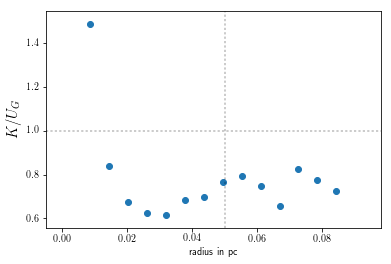

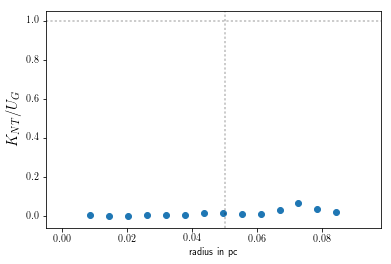

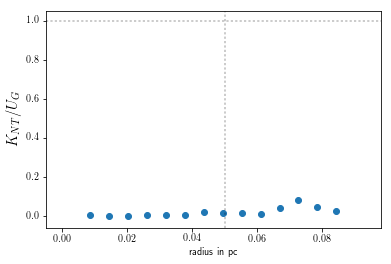

In [7]:
plt.scatter(radiusinpc[1:],virialparameter[1:])
plt.axvline(x=0.05,linewidth=0.4,color='k',ls=':')
plt.axhline(y=1,linewidth=0.4,color='k',ls=':')
plt.xlabel('radius in pc')
plt.ylabel(r'$K/U_{G}$', fontsize=15)
plt.show()
plt.scatter(radiusinpc[1:],virial_NTparameter[1:])
plt.axvline(x=0.05,linewidth=0.4,color='k',ls=':')
plt.axhline(y=1,linewidth=0.4,color='k',ls=':')
plt.xlabel('radius in pc')
plt.ylabel(r'$K_{NT}/U_{G}$', fontsize=15)
plt.show()
# with virial equilibrium assumption : 
plt.scatter(radiusinpc[1:],parameter[1:])
plt.axvline(x=0.05,linewidth=0.4,color='k',ls=':')
plt.axhline(y=1,linewidth=0.4,color='k',ls=':')
plt.xlabel('radius in pc')
plt.ylabel(r'$K_{NT}/U_{G}$', fontsize=15)
plt.show()

In [8]:
### estimate of the magnetic energy density with gravity and  kinetic energy ##
n_0 = 7.4e+05 # cm-3
r_flat= 0.0139    # in Pc 
index = 1.38      # is the power of the power profile
rc = 0.05
nc = n_0/(1+(rc/r_flat)**2)**index

sigma_NT_C = 24589.090
beta = 1/2
n =  n_0/(1+(radiusinpc/r_flat)**2)**index
print(sigma_NT_C,nc,mu)
B_cc = (sigma_NT_C  *(4* np.pi*mu* nc)**(.5))/beta
print(B_cc)

24589.09 19506.514150075942 3.869058666e-24
4.7892761060574745e-05


In [9]:
# magnetic field profile in micro gauss * 10^6
B = (B_cc *(n/nc)**(2/3))*10**6 
B1= (B_cc *(n/nc)**(1/2))*10**6 

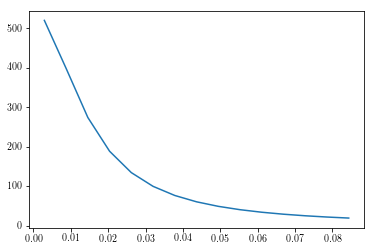

398.295511829


In [10]:
plt.plot(radiusinpc,B)
plt.show()
print(B[1])

In [11]:
kineticenergy = []
kineticnonthermal = []
potentialenergy = []
magneticenergy = []

for i in range(0,len(radiusinpc)):
    m = realmassforanyindexforvirialanalysis(radiusinpc,r_flat,n_0,index,i)
    realmass_list.append(float(m))
    kinetic = m * (vnonthermal[i]**2+ vthermal[i]**2)*10**4  # to make sigma in cm**2/s
    kineticenergy.append(float(kinetic))
    kinetic_NT = m * (vnonthermal[i]**2)*10**4  # to make sigma in cm**2/s
    kineticnonthermal.append(float(kinetic_NT))
    potential = (3/5) * G * m**2 / (radiusinpc[i]*3.0857e+18)
    potentialenergy.append(potential)
    magnetic = ((B1[i]*10**-6)**2 *(radiusinpc[i]*3.0857e+18)**3) / 6
    magneticenergy.append(magnetic)
print(m)    
#     print(magneticenergy)
#     print(potential)
#     print(kinetic)
#     equilibrium1 = magneticenergy/potential
#     print(equilibrium1)

5.521489839492012e+33


In [12]:
print(magneticenergy)

[9.885347639028179e+39, 1.7901766182322713e+41, 4.7249110232386062e+41, 7.3973773311185411e+41, 9.4557791391011869e+41, 1.1011515242624105e+42, 1.2215477472737785e+42, 1.3177992467837239e+42, 1.3971715924310609e+42, 1.4644013471159334e+42, 1.5226311719053883e+42, 1.5740009014983967e+42, 1.6200080080822228e+42, 1.6617284019858744e+42, 1.6999541884688421e+42]


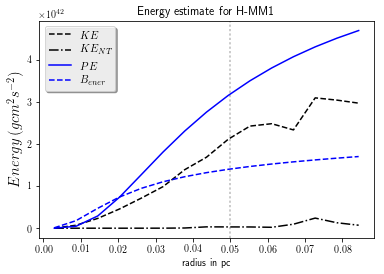

In [13]:
plt.plot(radiusinpc,kineticenergy,'k--',label=r'$KE$')
plt.plot(radiusinpc,kineticnonthermal,'k-.',label=r'$KE_{NT}$')
plt.plot(radiusinpc,potentialenergy,'b',label=r'$PE$')
plt.plot(radiusinpc,magneticenergy,'b--',label=r'$B_{ener}$')
plt.legend(numpoints=1,fancybox=True,shadow=True,fontsize=11,loc=2)
plt.axvline(x=0.05,linewidth=0.4,color='k',ls=':')
plt.title('Energy estimate for H-MM1')
plt.xlabel('radius in pc')
plt.ylabel(r' $ Energy \, (g cm^{2}s^{-2})$', fontsize=15)
plt.savefig("enerfyplotH_mm1.eps",format='eps',dpi=300)
plt.show()


In [14]:
print(radiusinpc)

[ 0.00290888  0.00872665  0.01454442  0.02036219  0.02617996  0.03199772
  0.03781549  0.04363326  0.04945103  0.0552688   0.06108656  0.06690433
  0.0727221   0.07853987  0.08435764]
